In [1]:
from google.colab import drive   #Mouting the google drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


As all the files are in pickle format , data has to be extracted from them

In [0]:
import pickle


with open('/gdrive/My Drive/Copy of train_image.pkl', 'rb') as f:
    data_train = pickle.load(f)

In [0]:
with open('/gdrive/My Drive/Copy of test_image.pkl', 'rb') as k:
  data_test = pickle.load(k)

In [0]:
import numpy as np


Now, the training data and the testing data are converted into list of arrays.

In [0]:
train_data =[]

for i in range(len(data_train)):
  aux = np.asarray(data_train[i])
  aux = aux.reshape(28,28)
  train_data.append(aux)

In [0]:
test_data =[]

for i in range(len(data_test)):
  aux = np.asarray(data_test[i])
  aux = aux.reshape(28,28)
  test_data.append(aux)

Here, it becomes a bit necessary to visualize the data

In [0]:
arr = np.asarray(test_data[4])

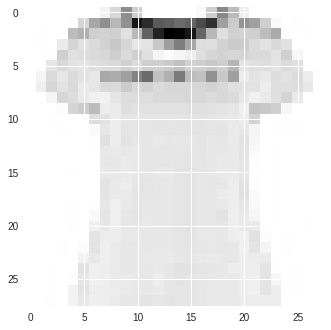

In [113]:
import matplotlib.pyplot as plt

plt.imshow(arr)
plt.show()

The, label file is extracted

In [0]:
with open('train_label.pkl', 'rb') as t:
  lebels = pickle.load(t)

Till here, I have just extracted the data. Now it modelling wll take place. For this, I will take 3 models and compare their peerformance.

In [10]:
import keras

Using TensorFlow backend.


In [0]:
# Importing necessary modules
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

Here , the 1st model is designed. The architecture of this model is very similar to VGG16 model but this has very few layers. I have not used the built-in VGG16  model because it accepts only coloured pictures but as plotted above, our dataset contains greyscale images.

In [0]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
		
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 
		
model.add(Dense(4))
model.add(Activation("softmax"))
 
		
		

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.optimizers import SGD

In [0]:
opt = SGD(lr=1e-2, momentum=0.9)

Here, test and train data listare converted to numpy arrays 

In [0]:
train = np.array(train_data)

In [0]:
test = np.array(test_data)

In [0]:
from keras.utils import np_utils

In [19]:
train_y = np_utils.to_categorical(lebels, 4)

IndexError: ignored

Here, seems to be a problem regarding index 6.

In [0]:
count =0
for i in range(len(lebels)):
  if(lebels[i] == 6):
      count = count+1

In [21]:
count

2000

  The classes present are- 0,2,3,6. But our model will predict classes from 0 to 4. So what I will do is that I will map all classes that are '6' and rename them as '1'.

In [0]:
for k in range(len(lebels)):
  if(lebels[k] ==6):
    lebels[k]=1

In [0]:
train_y = np_utils.to_categorical(lebels, 4)

Model compilation is required, I have used my customized optimizer.

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
 

Early Stopping is the feature where the training stops before the complete number of epochs are reached depending on the the decreasing performance of the model.

ModelCheckpoint will save the model at each point. I will customize it to save only the best results.

In [0]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5)

In [0]:
mp = keras.callbacks.ModelCheckpoint('weights_new.hdf5', monitor='val_loss', verbose=0, save_best_only=True, mode='auto', period=1)

In [27]:
train[0]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

It is known in Deep Learning that Neural Networks (specifically CNNs), works the best when input data is in the range 0 to 1. So, the all values are divided by 255 (in both train and test dataset).

In [0]:
train = train/255.0
test = test/255.0

In [29]:
train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

Now, as all other things are done, finally model is to be fit.

In [30]:
model.fit(train.reshape(-1,28,28,1), train_y,
	validation_split=0.2, epochs=30, callbacks=[es, mp])

Instructions for updating:
Use tf.cast instead.
Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.7358 - acc: 0.7947 - val_loss: 5.8141 - val_acc: 0.0100
Epoch 2/30
6400/6400 [==============================] - 3s 498us/step - loss: 0.5428 - acc: 0.8352 - val_loss: 2.3705 - val_acc: 0.1900
Epoch 3/30
6400/6400 [==============================] - 3s 496us/step - loss: 0.4501 - acc: 0.8613 - val_loss: 2.2723 - val_acc: 0.3444
Epoch 4/30
6400/6400 [==============================] - 3s 496us/step - loss: 0.4177 - acc: 0.8681 - val_loss: 2.1528 - val_acc: 0.1619
Epoch 5/30
6400/6400 [==============================] - 3s 494us/step - loss: 0.3883 - acc: 0.8777 - val_loss: 1.3725 - val_acc: 0.4863
Epoch 6/30
6400/6400 [==============================] - 3s 493us/step - loss: 0.3666 - acc: 0.8816 - val_loss: 1.9981 - val_acc: 0.3256
Epoch 7/30
6400/6400 [==============================] - 3s 490us/step - loss: 0.3479 - acc

This , does not seem to be a good model as validation accuracy is low.

Another model which can be constructed is ....

In [0]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding="same",
			input_shape=(28,28,1)))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=-1))
model1.add(Conv2D(32, (3, 3), padding="same"))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=-1))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
 

model1.add(Conv2D(64, (3, 3), padding="same"))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=-1))
model1.add(Conv2D(64, (3, 3), padding="same"))
model1.add(Activation("relu"))
model1.add(BatchNormalization(axis=-1))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
 
		
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation("relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
 
		
model1.add(Dense(4))
model1.add(Activation("softmax"))
 

In [0]:
model1.compile(loss="categorical_crossentropy", optimizer='adadelta',
	metrics=["accuracy"])

In [33]:
model1.fit(train.reshape(-1,28,28,1), train_y,
	validation_split=0.2, epochs=30, callbacks=[es, mp])

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 6s 883us/step - loss: 0.5915 - acc: 0.8231 - val_loss: 2.2946 - val_acc: 0.3000
Epoch 2/30
6400/6400 [==============================] - 4s 656us/step - loss: 0.4100 - acc: 0.8697 - val_loss: 1.9213 - val_acc: 0.3269
Epoch 3/30
6400/6400 [==============================] - 4s 651us/step - loss: 0.3495 - acc: 0.8855 - val_loss: 2.9971 - val_acc: 0.2238
Epoch 4/30
6400/6400 [==============================] - 4s 646us/step - loss: 0.3193 - acc: 0.8959 - val_loss: 2.7260 - val_acc: 0.1906
Epoch 5/30
6400/6400 [==============================] - 4s 645us/step - loss: 0.2776 - acc: 0.9072 - val_loss: 1.1662 - val_acc: 0.5500
Epoch 6/30
6400/6400 [==============================] - 4s 646us/step - loss: 0.2695 - acc: 0.9100 - val_loss: 1.2110 - val_acc: 0.4919
Epoch 7/30
6400/6400 [==============================] - 4s 646us/step - loss: 0.2511 - acc: 0.9123 - val_loss: 1.6679 - val_acc: 0.4669


The result seems to be a bit satisfactory with this model. The optimizer used was adadelta whereby the learning rate in not constant.

Now, 3rd model will be a bit simple  to check whether a simple model can outperfrom relatively complex models.

In [0]:
model_3 = Sequential()
model_3.add(Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]))
model_3.add(MaxPooling2D((2,2)))
model_3.add(Conv2D(64, (5, 5), padding="same"))
model_3.add(MaxPooling2D((2,2)))
model_3.add(Flatten())
model_3.add(Dense(1024, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(4, activation='softmax'))


In [0]:
model_3.compile(keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model_3.fit(train.reshape(-1,28,28,1), train_y, validation_split=0.10, batch_size=64, epochs=30, callbacks=[mp])

Train on 7200 samples, validate on 800 samples
Epoch 1/30
7200/7200 [==============================] - 2s 223us/step - loss: 0.1461 - acc: 0.9464 - val_loss: 0.7640 - val_acc: 0.7212
Epoch 2/30
7200/7200 [==============================] - 2s 210us/step - loss: 0.1455 - acc: 0.9489 - val_loss: 0.8278 - val_acc: 0.6800
Epoch 3/30
7200/7200 [==============================] - 2s 210us/step - loss: 0.1344 - acc: 0.9533 - val_loss: 0.7104 - val_acc: 0.7288
Epoch 4/30
7200/7200 [==============================] - 2s 212us/step - loss: 0.1335 - acc: 0.9526 - val_loss: 0.7574 - val_acc: 0.7087
Epoch 5/30
7200/7200 [==============================] - 2s 210us/step - loss: 0.1328 - acc: 0.9536 - val_loss: 0.7698 - val_acc: 0.7113
Epoch 6/30
7200/7200 [==============================] - 1s 208us/step - loss: 0.1147 - acc: 0.9625 - val_loss: 0.6289 - val_acc: 0.7650
Epoch 7/30
7200/7200 [==============================] - 2s 210us/step - loss: 0.1153 - acc: 0.9625 - val_loss: 0.8622 - val_acc: 0.6763
E

The result here seems to be best among the 3. On top of that, due to the ModelCheckPoint callback, the best is weights are stored. They are loaded back below.

In [0]:
model_3.load_weights('weights_new.hdf5')

In [0]:
pr = model_3.predict(test.reshape(-2,28,28,1))

The prediction will give us the probablilities of different classes. We need to select the class with maximum probability.

In [0]:
pr = pr.argmax(axis=1)

Now, class 1 is changed back to class 6

In [0]:
for i in range(len(pr)):
  if(pr[i]==1):
    pr[i]=6
  

Sample Submission file is loaded .

In [0]:
import pandas as pd
df = pd.read_csv('hitkul(sample_submission).csv')

In [0]:
index1 = [i for i in range(2000)]

In [93]:
df

,image_index,class
0,0,2
1,1,3
2,2,0
3,3,6


In [0]:
prediction = pd.DataFrame(index1)

In [0]:
prediction.columns= ['image_index']

In [0]:
prediction['class'] = pr

In [107]:
prediction.head()

,image_index,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


Finally, the predictions are saved as csv file.

In [0]:
prediction.to_csv('CV_prediction.csv', index=None)